In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime = pd.read_csv("/content/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
#renaming the columns
crime = crime.rename(columns={"Unnamed: 0":"city"})
crime.head(2)

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


all clustring methods are distance based models so, scaling data is mandatory

# i believe this data is different magnitude observations so row wise scaling is best option 

In [5]:
from sklearn import preprocessing

In [6]:
crime1 = crime.drop('city',axis=1)

In [7]:
crime_norm = preprocessing.normalize(crime1)
crime_norm

array([[0.05403139, 0.96601575, 0.23741065, 0.08677769],
       [0.0368722 , 0.96973889, 0.17698657, 0.1640813 ],
       [0.02643862, 0.95962381, 0.26112213, 0.10118482],
       [0.04452761, 0.9613916 , 0.25299779, 0.09866914],
       [0.03065655, 0.94013412, 0.30997176, 0.13829509],
       [0.03559422, 0.91914181, 0.35143658, 0.17436661],
       [0.02448606, 0.81620208, 0.57134146, 0.08236221],
       [0.02367351, 0.95496538, 0.28889709, 0.06339686],
       [0.04447826, 0.96754652, 0.23105589, 0.09213353],
       [0.07853358, 0.95233247, 0.27080544, 0.11644634],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277],
       [0.01964047, 0.90648301, 0.40791735, 0.10726716],
       [0.03942842, 0.94400732, 0.31466911, 0.09098866],
       [0.05444736, 0.85452107, 0.49153867, 0.1588048 ],
       [0.02725092, 0.69365977, 0.70604655, 0.13997063],
       [0.04479483, 0.85856764, 0.49274317, 0.1343845 ],
       [0.07934635, 0.89162397, 0.42536189, 0.13333459],
       [0.0594568 , 0.96134697,

In [8]:
crime_norm = pd.DataFrame(crime_norm,columns=['Murder','Assault','UrbanPop','Rape'])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


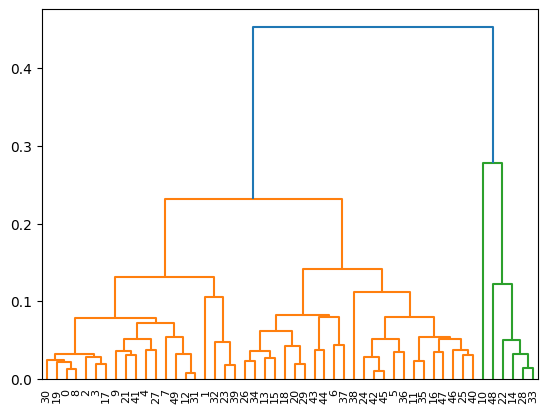

In [9]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='average'))

In [10]:
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)
y_hc

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1])

In [11]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
crime_norm['h_clusterid'] = Clusters
crime_norm.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.054031,0.966016,0.237411,0.086778,1
1,0.036872,0.969739,0.176987,0.164081,1
2,0.026439,0.959624,0.261122,0.101185,1
3,0.044528,0.961392,0.252998,0.098669,1
4,0.030657,0.940134,0.309972,0.138295,1


In [12]:
crime['h_clusterid']=Clusters
crime.head()

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1


In [13]:
df1 = crime.drop(['city'],axis=1)
df_clust = df1.groupby('h_clusterid').mean()
df_clust

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,2.616667,54.833333,62.000000,12.333333
1,8.493182,186.568182,66.022727,22.445455


profiling:
#cluster 0: low crime rate with respect to cluster 1
#cluster 1: high crime rate(murders,assault,rape) with respect to cluster 0 


In [14]:
# lets try with three clusters
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)

Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
crime_norm['h_clusterid'] = Clusters

crime['h_clusterid']=Clusters
crime.head()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [15]:
df1 = crime.drop(['city'],axis=1)
df_clust = df1.groupby('h_clusterid').mean()
df_clust

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,8.493182,186.568182,66.022727,22.445455
1,2.080000,56.600000,57.800000,10.760000
2,5.300000,46.000000,83.000000,20.200000


#profiling:
#cluster0:high crime rate compare to remaining two clusters
#cluster1:low crime rate compare to remaining two clusters, but assault percentage is high with respect murder and rape in this cluster.
#cluster2:high uran pop cluster eventhough low murder and low assult rate compare to cluster 0 but rape rate is almost equal to cluser 0.

# KMEANS Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [18]:
#standardization the crime data
crime_norm.head(2)

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.054031,0.966016,0.237411,0.086778,0
1,0.036872,0.969739,0.176987,0.164081,0


In [19]:
crime_norm = crime_norm.drop('h_clusterid',axis=1)

In [20]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [21]:
wcss

[0.7540963759591797,
 0.3278478050693132,
 0.22760245765174872,
 0.16395152491640727,
 0.12189729452276521,
 0.09933221098477707,
 0.08953343092362384,
 0.07539079931297346,
 0.06595521557123923]

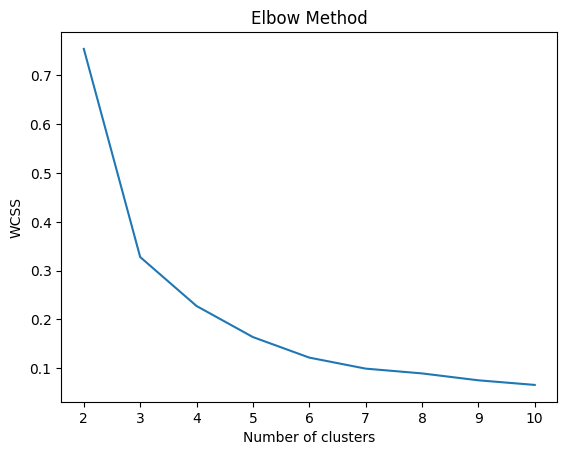

In [22]:
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Build Kmeans_Cluster algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(crime_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [24]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1], dtype=int32)

In [25]:
#Assign clusters to the data set
crime['Kmeans_clusterid'] = clusters_new.labels_

In [26]:
crime.groupby('Kmeans_clusterid').mean()

<ipython-input-26-afa03b4dec53>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby('Kmeans_clusterid').mean()


,Murder,Assault,UrbanPop,Rape,h_clusterid
Kmeans_clusterid,,,,,
0,5.020000,117.950000,64.600000,16.635000,0.000000
1,11.387500,243.750000,67.208333,27.287500,0.000000
2,2.616667,54.833333,62.000000,12.333333,1.166667


profiling:
#cluster0:crime is high compare to cluster 2 and crime rate is low if you compare with cluster 1.
#cluster1: high crime rate cluster
#cluster2: low crime rate cluster.

In [27]:
#trying with 4 clusters
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(crime_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
#Assign clusters to the data set
crime['Kmeans_clusterid'] = clusters_new.labels_
crime.head()

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,Kmeans_clusterid
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,0


In [29]:
crime.groupby('Kmeans_clusterid').mean()

<ipython-input-29-afa03b4dec53>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby('Kmeans_clusterid').mean()


,Murder,Assault,UrbanPop,Rape,h_clusterid
Kmeans_clusterid,,,,,
0,12.021053,260.526316,66.421053,27.694737,0.000000
1,4.881818,111.363636,68.545455,16.354545,0.000000
2,2.616667,54.833333,62.000000,12.333333,1.166667
3,6.542857,145.285714,63.500000,20.107143,0.000000


profiling: 
#cluster 0: high crime rate cluster in all (Murder, Assault,Rape) and murder percentage is quite high than remaining clusters
#cluster 1: Assault and rape percentage is quite high compare to murders
#cluster 2: Low crime rate compare to other clusters
#cluster 3: medium crime rate compare to other clusters.

#DBSCAN clustering

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [33]:
dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan.fit(crime_norm)
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [37]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
crime['dbscan_clusterid'] = dbscan.labels_
crime.head()

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,Kmeans_clusterid,dbscan_clusterid
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,0,0,0
2,Arizona,8.1,294,80,31.0,0,0,0
3,Arkansas,8.8,190,50,19.5,0,0,0
4,California,9.0,276,91,40.6,0,0,0


In [38]:
crime_dbscan = crime.drop(['h_clusterid','Kmeans_clusterid'],axis=1)
crime_dbscan.head()

,city,Murder,Assault,UrbanPop,Rape,dbscan_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [39]:
crime_dbscan.groupby('dbscan_clusterid').mean()

<ipython-input-39-47122f335b68>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_dbscan.groupby('dbscan_clusterid').mean()


,Murder,Assault,UrbanPop,Rape
dbscan_clusterid,,,,
0,7.788,170.76,65.54,21.232


In [42]:
dbscan = DBSCAN(eps=0.1, min_samples=2)
dbscan.fit(crime_norm)
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
crime_dbscan['dbscan_clusterid'] = dbscan.labels_
crime_dbscan.groupby('dbscan_clusterid').mean()


<ipython-input-42-50520ed290f5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_dbscan.groupby('dbscan_clusterid').mean()


,Murder,Assault,UrbanPop,Rape
dbscan_clusterid,,,,
-1,5.300000,46.000000,83.000000,20.200000
0,8.493182,186.568182,66.022727,22.445455
1,2.080000,56.600000,57.800000,10.760000


profiling:
#cluster -1: rape percentage is high compare to murder and Assault.
# cluster 0: high crime rate cluster.
# cluster 1: low crime rate with compare to other cluster.

In [43]:
from sklearn import metrics
print(metrics.silhouette_score(crime_norm,dbscan.labels_))

0.5431936191625951
